- ticket_data.csv: Containing a ticket history (one line => a ticket proposal on
tictactrip)
- cities.csv the cities served by tictactrip (link thanks to the columns o_city (origin_city), d_city
(destination_city) from ticket_data)
- stations.csv stations served by tictactrip (link via o_station, d_station from ticket_data)
- providers.csv info on the different providers (link via company from ticket_data)
A provider is a "sub-company". For example TGV and TER are two providers of VSC
(SNCF trips)

In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt

# Reading all the dataset and analysis

In [3]:
tickets = pd.read_csv("Data/ticket_data.csv")
cities = pd.read_csv("Data/cities.csv")
stations = pd.read_csv("Data/stations.csv")
providers = pd.read_csv("Data/providers.csv")

In [4]:
print(tickets.shape)
tickets.head(5)

(74168, 12)


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [5]:
print(cities.shape)
cities.head(5)

(8040, 6)


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


In [6]:
print(stations.shape)
stations.head(5)

(11035, 4)


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [7]:
print(providers.shape)
providers.head(5)

(227, 10)


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


## The below code is to convert the co-ordiates into distance
Refered : https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

I created the dataframe, where is gives the information the distance between cities

In [8]:
cities['latitude'] = np.radians(cities['latitude'])
cities['longitude'] = np.radians(cities['longitude'])

dist = DistanceMetric.get_metric('haversine')

cities[["latitude", "longitude"]].to_numpy()
distance = (dist.pairwise(cities[["latitude", "longitude"]].to_numpy())*6373)
distances = pd.DataFrame(distance,  columns=cities.unique_name.unique(), index=cities.unique_name.unique())
distances.head(5)

,padua,barcelona,basel,erlangen,balș,град-пожаревац,bussy-lettree,chamonix-italia,borger,okres-zvolen,...,portsmouth,southampton,funchal,breme,malaga,saint-andre-lez-lille,kiev,brighton,manises,south-cambridgeshire
padua,0.000000,901.940336,406.605588,469.808395,969.186501,736.079151,689.014930,385.802831,8793.408233,653.589865,...,1131.596839,1157.148004,2841.038272,882.030846,1670.068949,877.572398,1493.610735,1074.454167,1205.474599,1148.707829
barcelona,901.940336,0.000000,814.160104,1141.951259,1811.671259,1583.173257,841.282166,625.212399,8449.927142,1550.891363,...,1076.907140,1093.594680,1947.145477,1392.870729,771.467123,1033.198802,2395.026762,1064.545719,306.679238,1211.919471
basel,406.605588,814.160104,0.000000,333.978560,1320.776227,1094.881111,283.187170,204.026688,8387.123027,861.902631,...,725.233100,750.790770,2647.643822,616.308728,1562.328516,475.928077,1693.458860,667.850432,1110.608591,746.725679
erlangen,469.808395,1141.951259,333.978560,0.000000,1148.920194,946.255990,498.324955,517.922616,8445.052785,602.254439,...,870.198426,894.047410,2974.039674,417.356820,1895.799400,579.882889,1393.684384,804.668519,1441.860027,823.904130
balș,969.186501,1811.671259,1320.776227,1148.920194,0.000000,233.509979,1589.937626,1353.489207,9561.998554,603.835079,...,2008.282115,2033.036655,3753.641984,1477.927619,2541.648259,1722.100491,832.414448,1944.123390,2094.271175,1972.775021


# I created the module. The module is in app folder and file name data_cleaning.py

The module is in 5 section :
* first section: replacing the numbers by city name using o_city and d_city columns and created the new columns with cities names city_origin and city_destiny
* second section: replacing the numbers by stations name using o_station and d_station and created the new columns with station name station_origin and station_destiny
* third section: replacing the numbers by type of travel used
* fourth section: calculating the distance for the journeys and created the columns distance
* fifth section: calculating the time travelled for the journeys and created the column time

At-last this module create an new dataframe with required information

In [9]:
from app.data_cleaning import data_clean

df = data_clean(tickets, cities, stations, providers, distances)

In [10]:
df.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,city_origin,city_destiny,station_origin,station_destiny,transport_name,type,cities_distance,travel_time
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,orleans,montpellier,NaN,NaN,bbc,carpooling,503.355132,6.14940
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,orleans,montpellier,Avenue Georges Pompidou,Station Les Sabines,ouibus,bus,503.355132,17.78340
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,orleans,montpellier,Les Aubrais,Montpellier,corailintercite,train,503.355132,31.86054
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,orleans,montpellier,Les Aubrais,Montpellier,corailintercite,train,503.355132,21.52290
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,orleans,montpellier,Les Aubrais,Montpellier,coraillunea,train,503.355132,21.70572


EDA part

In [11]:
transport = df.groupby(by="transport_name").nunique(dropna = True)
print("Number of distinct traveller companies: ", transport.shape[0])

Number of distinct traveller companies:  20


In [12]:
col_list = df["transport_name"].unique()

price_dict = {}
for x in col_list:
    temp_data = df[df["transport_name"] == x]
    temp_data = temp_data["price_in_cents"].sort_values(ascending = False)
    df_max = temp_data.max()
    df_min = temp_data.min()
    df_avg = temp_data.mean()
    dataframe_cols = [df_max,df_min,df_avg]
    price_dict[x] = dataframe_cols

# Calculated the Maximum and Minimum and Average price charged by travel companies

In [13]:
Price_dataframe = pd.DataFrame.from_dict(price_dict, orient='index',columns=['Max_price', 'Low_price', 'Avg_price'])
Price_dataframe.index.name = "Travel Companies"
Price_dataframe

,Max_price,Low_price,Avg_price
Travel Companies,,,
bbc,16150,300,2742.171907
ouibus,14596,850,3333.039045
corailintercite,27140,1140,6909.927041
coraillunea,13400,7530,10369.285714
flixbus,22900,850,3759.361631
isilines,13596,850,3075.794648
tgv,35100,1230,9099.485787
train,30160,490,6892.843413
eurolines,16890,1400,4747.602759


# Calculated the Maximum, Minimum and Average Price and distance by Bus

* Dataframe displayed the Top 20 travel cities by customer and their price and distance and time travel in hours

In [14]:
Bus_distance = df[df["type"] == "bus"]
Bus_distance = Bus_distance.groupby(['city_origin','city_destiny',"type", "cities_distance", "price_in_cents", "travel_time"]).size().sort_values(ascending=False)
Bus_distance_dataframe = pd.DataFrame(Bus_distance, columns=["count"])
Bus_distance_dataframe.reset_index(level=["city_origin", "city_destiny", "type", "cities_distance", "price_in_cents", "travel_time"], inplace=True)
Bus_distance_dataframe.head(20)

,city_origin,city_destiny,type,cities_distance,price_in_cents,travel_time,count
0,paris,lille,bus,205.907209,1990,7.5621,49
1,paris,lille,bus,205.907209,1990,6.5649,45
2,paris,lyon,bus,390.750890,2000,6.3156,33
3,paris,lille,bus,205.907209,1990,5.8170,33
4,paris,lille,bus,205.907209,1590,4.1550,29
5,paris,london,bus,344.519465,5500,8.8917,26
6,lyon,paris,bus,390.750890,2900,8.8086,24
7,paris,london,bus,344.519465,5500,9.8889,23
8,paris,london,bus,344.519465,5500,8.1438,22
9,paris,lille,bus,205.907209,1990,11.2185,22


In [15]:
from app.distance_price import distance_price

distance_price(Bus_distance_dataframe)

Bus travel distance less than 200: 
Average price is 2242.78 cents for 10.72 hours travel
Minimun price is 850.00 cents for 1.08 hours travel
Maximum price is 22900.00 cents for 316.86 hours travel


Bus travel distance between 201 - 800: 
Average price is 3789.46 cents for 16.32 hours travel
Minimun price is 850.00 cents for 1.08 hours travel
Maximum price is 22900.00 cents for 491.47 hours travel


Bus travel distance more than 801: 
Average price is 6964.71 cents for 27.29 hours travel
Minimun price is 2290.00 cents for 12.22 hours travel
Maximum price is 17400.00 cents for 352.01 hours travel


In [29]:
def plot_mean_Std(dataframe: pd.DataFrame, window) -> None:
    rolling_mean = dataframe.rolling(window = window).mean()
    # print(rolling_mean)
    rolling_std = dataframe.rolling(window=window).std()
    # print(rolling_std)
    plt.plot(dataframe, label = "series")
    plt.plot(rolling_mean, label = "rolling mean")
    plt.plot(rolling_std, label = "rolling std")
    plt.legend(loc = "best")
    plt.show()

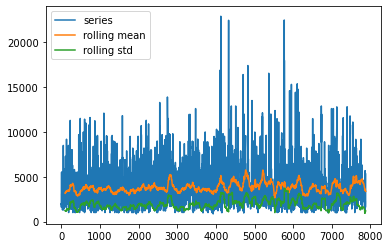

In [30]:
plot_mean_Std(Bus_distance_dataframe["price_in_cents"], 100)

* The above graph explain the mean and standard deviation of price variation along the time period

# Calculated the Maximum, Minimum and Average Price and distance by Carpooling

* Dataframe displayed the Top 20 travel cities by customer and their price and distance and time travel in hours

In [20]:
Car_distance = df[df["type"] == "carpooling"]
Car_distance = Car_distance.groupby(['city_origin','city_destiny',"type", "cities_distance", "price_in_cents", "travel_time"]).size().sort_values(ascending=False)
Car_distance_dataframe = pd.DataFrame(Car_distance, columns=["count"])
Car_distance_dataframe.reset_index(level=["city_origin", "city_destiny", "type", "cities_distance", "price_in_cents", "travel_time"], inplace=True)
Car_distance_dataframe.head(20)

,city_origin,city_destiny,type,cities_distance,price_in_cents,travel_time,count
0,paris,lille,carpooling,205.907209,1700,2.6592,602
1,paris,lille,carpooling,205.907209,1700,2.4930,478
2,paris,lille,carpooling,205.907209,1550,2.4930,366
3,paris,lille,carpooling,205.907209,1700,2.8254,352
4,paris,lyon,carpooling,390.750890,3600,4.9860,272
5,paris,lyon,carpooling,390.750890,3600,5.1522,271
6,paris,orleans,carpooling,109.698356,950,1.4958,266
7,paris,lille,carpooling,205.907209,1800,2.8254,233
8,paris,lille,carpooling,205.907209,1550,2.8254,229
9,paris,lille,carpooling,205.907209,1800,2.9916,223


In [21]:
distance_price(Car_distance_dataframe)

Bus travel distance less than 200: 
Average price is 1250.09 cents for 2.17 hours travel
Minimun price is 300.00 cents for 0.33 hours travel
Maximum price is 12850.00 cents for 17.28 hours travel


Bus travel distance between 201 - 800: 
Average price is 3220.98 cents for 4.92 hours travel
Minimun price is 300.00 cents for 0.33 hours travel
Maximum price is 16150.00 cents for 29.09 hours travel


Bus travel distance more than 801: 
Average price is 8480.80 cents for 12.86 hours travel
Minimun price is 4496.00 cents for 7.81 hours travel
Maximum price is 16150.00 cents for 29.09 hours travel


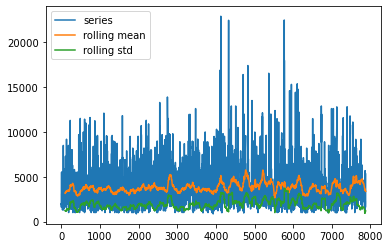

In [31]:
plot_mean_Std(Bus_distance_dataframe["price_in_cents"], 100)

* The above graph explain the mean and standard deviation of price variation along the time period

# Calculated the Maximum, Minimum and Average Price and distance by Train

* Dataframe displayed the Top 20 travel cities by customer and their price and distance and time travel in hours

In [22]:
Train_price = df[df["type"] == "train"]
Train_price = Train_price.groupby(['city_origin','city_destiny',"type", "cities_distance", "price_in_cents", "travel_time"]).size().sort_values(ascending=False)
Train_price_dataframe = pd.DataFrame(Train_price, columns=["count"])
Train_price_dataframe.reset_index(level=["city_origin", "city_destiny", "type", "cities_distance", "price_in_cents", "travel_time"], inplace=True)
Train_price_dataframe.head(20)

,city_origin,city_destiny,type,cities_distance,price_in_cents,travel_time,count
0,paris,amsterdam,train,431.109020,18100,3.77274,111
1,paris,lyon,train,390.750890,7480,5.90010,103
2,lyon,paris,train,390.750890,6830,5.41812,92
3,paris,lyon,train,390.750890,7480,6.06630,73
4,paris,lyon,train,390.750890,7540,6.06630,73
5,paris,lille,train,205.907209,4500,2.89188,73
6,paris,amsterdam,train,431.109020,13180,5.66742,56
7,lyon,paris,train,390.750890,6790,5.50122,55
8,lyon,paris,train,390.750890,6670,5.41812,44
9,paris,lyon,train,390.750890,7480,5.96658,40


In [23]:
distance_price(Train_price_dataframe)

Bus travel distance less than 200: 
Average price is 3423.64 cents for 4.74 hours travel
Minimun price is 490.00 cents for 0.65 hours travel
Maximum price is 25100.00 cents for 34.35 hours travel


Bus travel distance between 201 - 800: 
Average price is 8483.90 cents for 8.00 hours travel
Minimun price is 490.00 cents for 0.65 hours travel
Maximum price is 38550.00 cents for 48.31 hours travel


Bus travel distance more than 801: 
Average price is 16145.02 cents for 12.06 hours travel
Minimun price is 1940.00 cents for 3.54 hours travel
Maximum price is 37550.00 cents for 40.50 hours travel


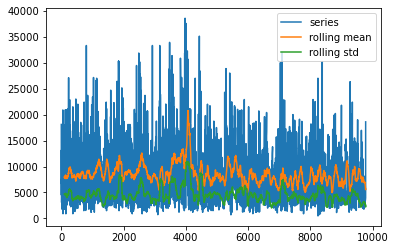

In [32]:
plot_mean_Std(Train_price_dataframe["price_in_cents"], 100)

* The above graph explain the mean and standard deviation of price variation along the time period